In [ ]:
# Step 1: Upload your module
import sys
import os
sys.path.append(os.path.abspath(".."))


from src.date_alignment import DateAligner
from src.news import NewsAnalyzer
import pandas as pd

# Step 2: Load news data
news_filepath = '../data/raw_analyst_ratings.csv'
news_analyzer = NewsAnalyzer(news_filepath)
news_df = news_analyzer.df[["date", "headline"]]  # Only keep what's needed

# Step 3: Load one stock file (e.g., AAPL)
stock_filepath = '../data/yfinance/AAPL_historical_data.csv'
stock_df = pd.read_csv(stock_filepath)

# Step 4: Align dates using the module
aligner = DateAligner(news_df, stock_df)
aligned_df = aligner.align()

# Step 5: Display merged data
print(aligned_df.head())

# Optional: Save to CSV
aligned_df.to_csv("aligned_news_stock_AAPL.csv", index=False)


c:\Users\soswo\OneDrive\Desktop\projects\a\Predicting-Price-Moves-with-News-Sentiment\src\news.py:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  self.df["date"] = pd.to_datetime(self.df["date"], format='mixed', errors='coerce')


         date                                           headline        Date  \
0  2020-05-22  46 Stocks Moving In Friday's Mid-Day Session B...  2020-05-22   
1  2020-05-26  71 Biggest Movers From Friday 71 Biggest Mover...  2020-05-26   
2  2020-06-03  Stocks That Hit 52-Week Highs On Wednesday Sto...  2020-06-03   
3  2020-06-05  Stocks That Hit 52-Week Highs On Friday Stocks...  2020-06-05   

        Open       High        Low      Close  Adj Close     Volume  \
0  78.942497  79.807503  78.837502  79.722504  77.768188   81803200   
1  80.875000  81.059998  79.125000  79.182503  77.241432  125522000   
2  81.165001  81.550003  80.574997  81.279999  79.287506  104491200   
3  80.837502  82.937500  80.807503  82.875000  80.843407  137250400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  


                                            headline  polarity sentiment
0            Stocks That Hit 52-Week Highs On Friday       0.0   neutral
1         Stocks That Hit 52-Week Highs On Wednesday       0.0   neutral
2                      71 Biggest Movers From Friday       0.0   neutral
3       46 Stocks Moving In Friday's Mid-Day Session       0.0   neutral
4  B of A Securities Maintains Neutral on Agilent...       0.0   neutral


C:\Users\soswo\AppData\Local\Temp\ipykernel_19828\396451746.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_results, x='sentiment', palette='coolwarm')


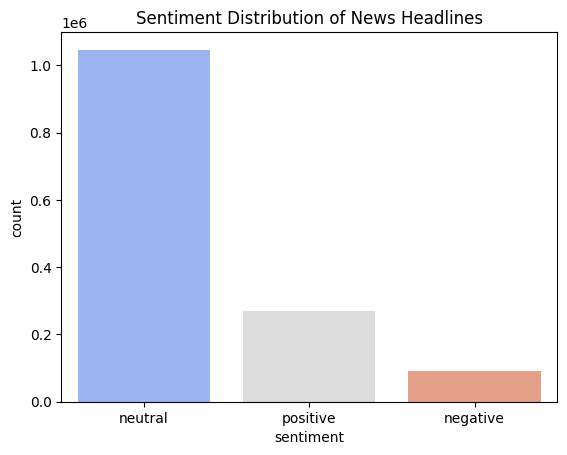

In [3]:
import os
import sys
sys.path.append(os.path.abspath(".."))  # Adjust if your notebook is in a subfolder

# Import your module
from src.sentiment_analysis import HeadlineSentimentAnalyzer

# Provide your uploaded file path
news_file = '../data/raw_analyst_ratings.csv'

# Initialize the analyzer
analyzer = HeadlineSentimentAnalyzer(news_file)

# Run sentiment analysis
df_results = analyzer.analyze_sentiment()

# Display the first few rows
print(df_results.head())

# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_results, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution of News Headlines")
plt.show()


In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adjust if your notebook is in a subfolder

from src.daily_stock_returns import DailyReturnCalculator

# File paths (adjust if uploaded somewhere else in Colab)
stock_files = [
    "../data/yfinance/AAPL_historical_data.csv",
    "../data/yfinance/AMZN_historical_data.csv",
    "../data/yfinance/GOOG_historical_data.csv",
    "../data/yfinance/META_historical_data.csv",
    "../data/yfinance/MSFT_historical_data.csv",
    "../data/yfinance/NVDA_historical_data.csv", 
    "../data/yfinance/TSLA_historical_data.csv",
]

calculator = DailyReturnCalculator(stock_files)
result_df = calculator.show_sample(10)  # Show top 10 rows



          Date     Close ticker  daily_return
1   1980-12-15  0.121652   AAPL     -0.052171
2   1980-12-16  0.112723   AAPL     -0.073398
3   1980-12-17  0.115513   AAPL      0.024751
4   1980-12-18  0.118862   AAPL      0.028992
5   1980-12-19  0.126116   AAPL      0.061029
6   1980-12-22  0.132254   AAPL      0.048670
7   1980-12-23  0.137835   AAPL      0.042199
8   1980-12-24  0.145089   AAPL      0.052628
9   1980-12-26  0.158482   AAPL      0.092309
10  1980-12-29  0.160714   AAPL      0.014084


[AAPL] Pearson Correlation: -0.0897, p-value: 9.1029e-01


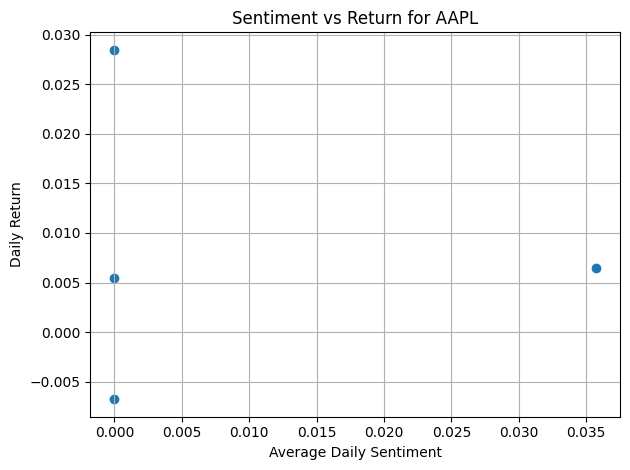

[AMZN] Pearson Correlation: -1.0000, p-value: 1.0000e+00


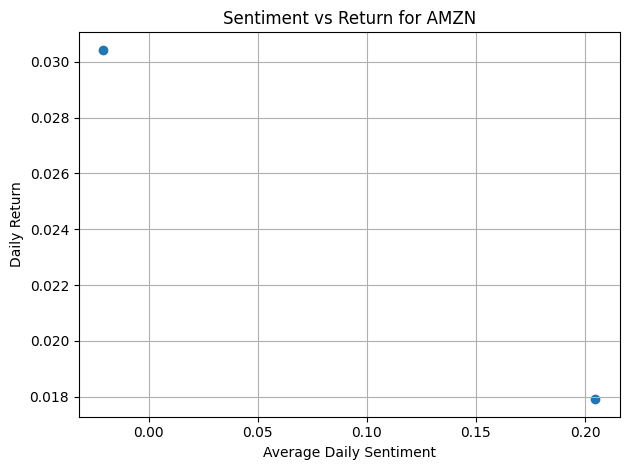

[GOOG] Pearson Correlation: -0.0894, p-value: 8.8626e-01


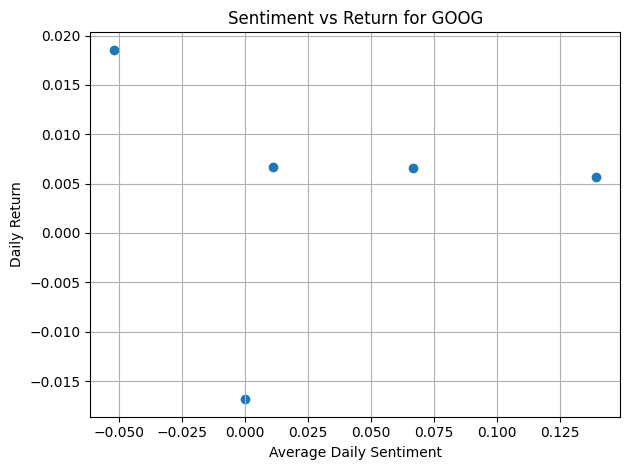

[META] Not enough data to compute correlation.
[MSFT] Not enough data to compute correlation.
[NVDA] Pearson Correlation: 0.1757, p-value: 8.2429e-01


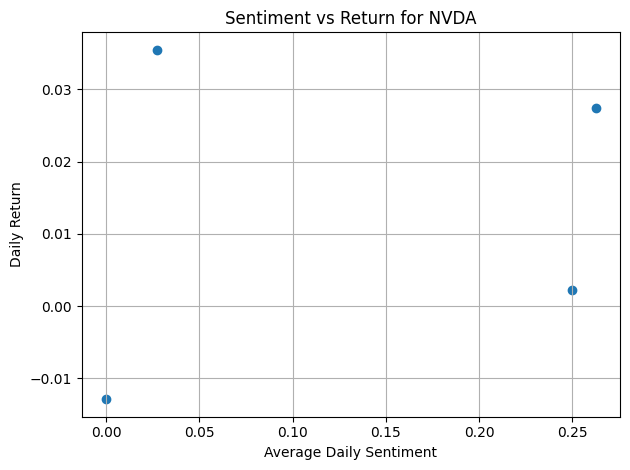

[TSLA] Not enough data to compute correlation.


In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adjust if your notebook is in a subfolder

from src.correlation_analysis import run_analysis

stock_files = [
    "../data/yfinance/AAPL_historical_data.csv",
    "../data/yfinance/AMZN_historical_data.csv",
    "../data/yfinance/GOOG_historical_data.csv",
    "../data/yfinance/META_historical_data.csv",
    "../data/yfinance/MSFT_historical_data.csv",
    "../data/yfinance/NVDA_historical_data.csv",
    "../data/yfinance/TSLA_historical_data.csv"
]

news_filepath = "../data/raw_analyst_ratings.csv"

run_analysis(stock_files, news_filepath)
